# CLEANING AND FEATURE ENGINEERING

In [25]:
import pandas as pd
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
df = pd.read_csv('./data/author_scrape.csv')
df.drop(columns='Unnamed: 0', inplace=True)

### CLEAN

In [27]:
df.head()

,id,author,title,selftext,subreddit,created_utc
0,t4d8wr,aman1791,First setup! I got reallyyy lucky with marketp...,NaN,espresso,1646155687
1,t4cy77,rc1024,Made myself a wdt tool with stand.,NaN,espresso,1646154916
2,t4cx8p,carsononline,Help with Lelit Bianca Paddle Resolution,"So, I have a lelit bianca, and it seems as tho...",espresso,1646154847
3,t4cvtk,carsononline,Lelit Bianca Resolution on Paddle Question,NaN,espresso,1646154740
4,t4cuu0,no_lemming,tired of trial and error on espresso bean purc...,Anyone have a suggestion for a bean that can b...,espresso,1646154671


In [28]:
df.isnull().sum()

id                0
author            0
title             0
selftext       2960
subreddit         0
created_utc       0
dtype: int64

In [29]:
#replace null values in selftext with empty strings
df = df.fillna('')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4199 non-null   object
 1   author       4199 non-null   object
 2   title        4199 non-null   object
 3   selftext     4199 non-null   object
 4   subreddit    4199 non-null   object
 5   created_utc  4199 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 197.0+ KB


## FEATURE ENGINEERING

In [31]:
#turn subreddit into a binary called topics
df['topics'] = df['subreddit'].map({'espresso': 0, 'CraftBeer': 1})

### create new columns for groupings of text

In [32]:
#create title_selftext column
df['title_selftext'] = df['title'] + df['selftext']

#create a text column by adding title, selftext, and author
df['text'] = df['title'] + df['selftext'] + df['author']

### engineer sentiment columns

In [33]:
# instantiate sentiment analysis
sia = SentimentIntensityAnalyzer()

In [34]:
#apply sia to title
df['sentiment'] = df['title'].apply(sia.polarity_scores)

#extract neutral, negaive, and positive sentiment scores
df['sentiment_compound'] = df['sentiment'].map(lambda x: x['compound'])
df['sentiment_neu'] = df['sentiment'].map(lambda x: x['neu'])
df['sentiment_neg'] = df['sentiment'].map(lambda x: x['neg'])
df['sentiment_pos'] = df['sentiment'].map(lambda x: x['pos'])

In [35]:
#apply sia to title_selftext
df['title_selftext_sentiment'] = df['title_selftext'].apply(sia.polarity_scores)

#create different sentiment columns by extracting from sentiment (was library)
df['title_selftext_sentiment_compound'] = df['title_selftext_sentiment'].map(lambda x: x['compound'])
df['title_selftext_sentiment_neu'] = df['title_selftext_sentiment'].map(lambda x: x['neu'])
df['title_selftext_sentiment_neg'] = df['title_selftext_sentiment'].map(lambda x: x['neg'])
df['title_selftext_sentiment_pos'] = df['title_selftext_sentiment'].map(lambda x: x['pos'])

In [36]:
#apply sia to text
df['text_sentiment'] = df['text'].apply(sia.polarity_scores)

#create different sentiment columns by extracting from sentiment (was library)
df['text_sentiment_compound'] = df['text_sentiment'].map(lambda x: x['compound'])
df['text_sentiment_neu'] = df['text_sentiment'].map(lambda x: x['neu'])
df['text_sentiment_neg'] = df['text_sentiment'].map(lambda x: x['neg'])
df['text_sentiment_pos'] = df['text_sentiment'].map(lambda x: x['pos'])

### engineer character and wordcount columns

In [37]:
#how many characters in title
df['title_length'] = [len(char) for char in df['title']]
#how many characters in title_selftext
df['title_selftext_length'] = [len(char) for char in df['title_selftext']]
#how many characters in text
df['text_length'] = [len(char) for char in df['text']]

#how many words in title
df['title_word_count'] = [len(word.split(' ')) for word in df['title']]
#how many words in title_selftext
df['title_selftext_word_count'] = [len(word.split(' ')) for word in df['title_selftext']]
#how many words in text
df['text_word_count'] = [len(word.split(' ')) for word in df['text']]

In [38]:
df.head()

,id,author,title,selftext,subreddit,created_utc,topics,title_selftext,text,sentiment,...,text_sentiment_compound,text_sentiment_neu,text_sentiment_neg,text_sentiment_pos,title_length,title_selftext_length,text_length,title_word_count,title_selftext_word_count,text_word_count
0,t4d8wr,aman1791,First setup! I got reallyyy lucky with marketp...,,espresso,1646155687,0,First setup! I got reallyyy lucky with marketp...,First setup! I got reallyyy lucky with marketp...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",...,0.4753,0.721,0.000,0.279,67,67,75,10,10,10
1,t4cy77,rc1024,Made myself a wdt tool with stand.,,espresso,1646154916,0,Made myself a wdt tool with stand.,Made myself a wdt tool with stand.rc1024,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",...,0.0000,1.000,0.000,0.000,34,34,40,7,7,7
2,t4cx8p,carsononline,Help with Lelit Bianca Paddle Resolution,"So, I have a lelit bianca, and it seems as tho...",espresso,1646154847,0,"Help with Lelit Bianca Paddle ResolutionSo, I ...","Help with Lelit Bianca Paddle ResolutionSo, I ...","{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",...,0.8410,0.773,0.088,0.139,40,861,873,6,154,154
3,t4cvtk,carsononline,Lelit Bianca Resolution on Paddle Question,,espresso,1646154740,0,Lelit Bianca Resolution on Paddle Question,Lelit Bianca Resolution on Paddle Questioncars...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",...,0.0000,1.000,0.000,0.000,42,42,54,6,6,6
4,t4cuu0,no_lemming,tired of trial and error on espresso bean purc...,Anyone have a suggestion for a bean that can b...,espresso,1646154671,0,tired of trial and error on espresso bean purc...,tired of trial and error on espresso bean purc...,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",...,0.9325,0.780,0.037,0.183,52,488,498,9,97,97


#### save to csv

In [39]:
#df.to_csv('./data/cleaned_engineered.csv')

### COUNTVECTORIZE

Create situation-specific stop words that include pre-packed english stop words as well as a custom list pulled from the most common non-indicative words from the dataframe

In [40]:
from sklearn.feature_extraction import text 
my_additional_stop_words = ['just', 'like', 'www', 'https', 'com', 've', 'know', 'new', 'good', 'got']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
#instantiate
cvec = CountVectorizer(min_df=2, stop_words=stop_words)
#fit 
cvec.fit(df['text'])

CountVectorizer(min_df=2,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [55]:
#transform and save
csr = cvec.transform(df['text'])
#convert to df, desify, and save using get_feature_names for sorting and use later
text_cvec = pd.DataFrame(csr.todense(), columns=cvec.get_feature_names())

In [56]:
#sum by column, sort descending, give list
text_cvec.sum(axis=0).sort_values(ascending=False)[:15].index

Index(['espresso', 'machine', 'coffee', 'beer', 'grinder', 'amp', 'shot',
       'time', 'water', 'really', 'grind', 'beans', 'don', 'looking',
       'brewing'],
      dtype='object')

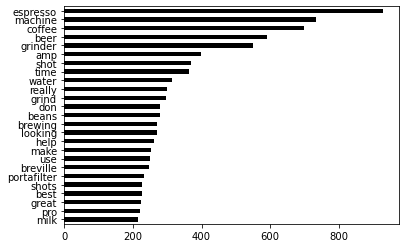

In [57]:
text_cvec.sum(axis=0).sort_values(ascending=True).tail(25).plot(kind='barh', cmap='afmhot');

In [58]:
#concat cvec and df 
df1 = text_cvec
df2 = df['topics']
df_new = pd.concat([df1, df2], axis=1, join='inner')

In [59]:
#concat cvec and df 
df1 = text_cvec
df2 = df['topics']
df_new = pd.concat([df1, df2], axis=1, join='inner')

save df_new to csv 

In [60]:
df_new.shape
#full df-new = 4199, 14507

(4199, 5554)

In [61]:
df_new.head()

,00,000,00chill00chill00,01,02,08,10,100,1000,100ml,...,zero,zeros,zone,zookeepergame109,øl,بالمزاحميةamaan,تنظيف,شركة,مكيفات,topics
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_new.to_csv('./data/cvec.csv')

In [ ]:
#learned a lesson when making this file. Had not adjusted the min_df and it was huge
#needed to whittle df_new down to 4199, 12457